In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv("/content/bank.csv")

In [162]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data description

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [164]:
df.shape

(11162, 17)

In [165]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Data Explonatory Analysis

In [166]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
#there is no unwanted column present in given dataset to remove

In [167]:
#missing value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
#no missing value is there

In [168]:
#find feature with one value
for i in df.columns:
  print(i,df[i].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [ ]:
#no feature with one value

In [169]:
#categorical features
l=[i for i in df.columns if((df[i].dtypes=='O')&(i not in ['deposit']))]
l

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [170]:
#there are 9 categorical feature
#deposit is target column

In [171]:
#unique value of each categorical features
for i in l:
  print(i,len(df[i].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4


In [172]:
#feature job and month has highest number of categorical value

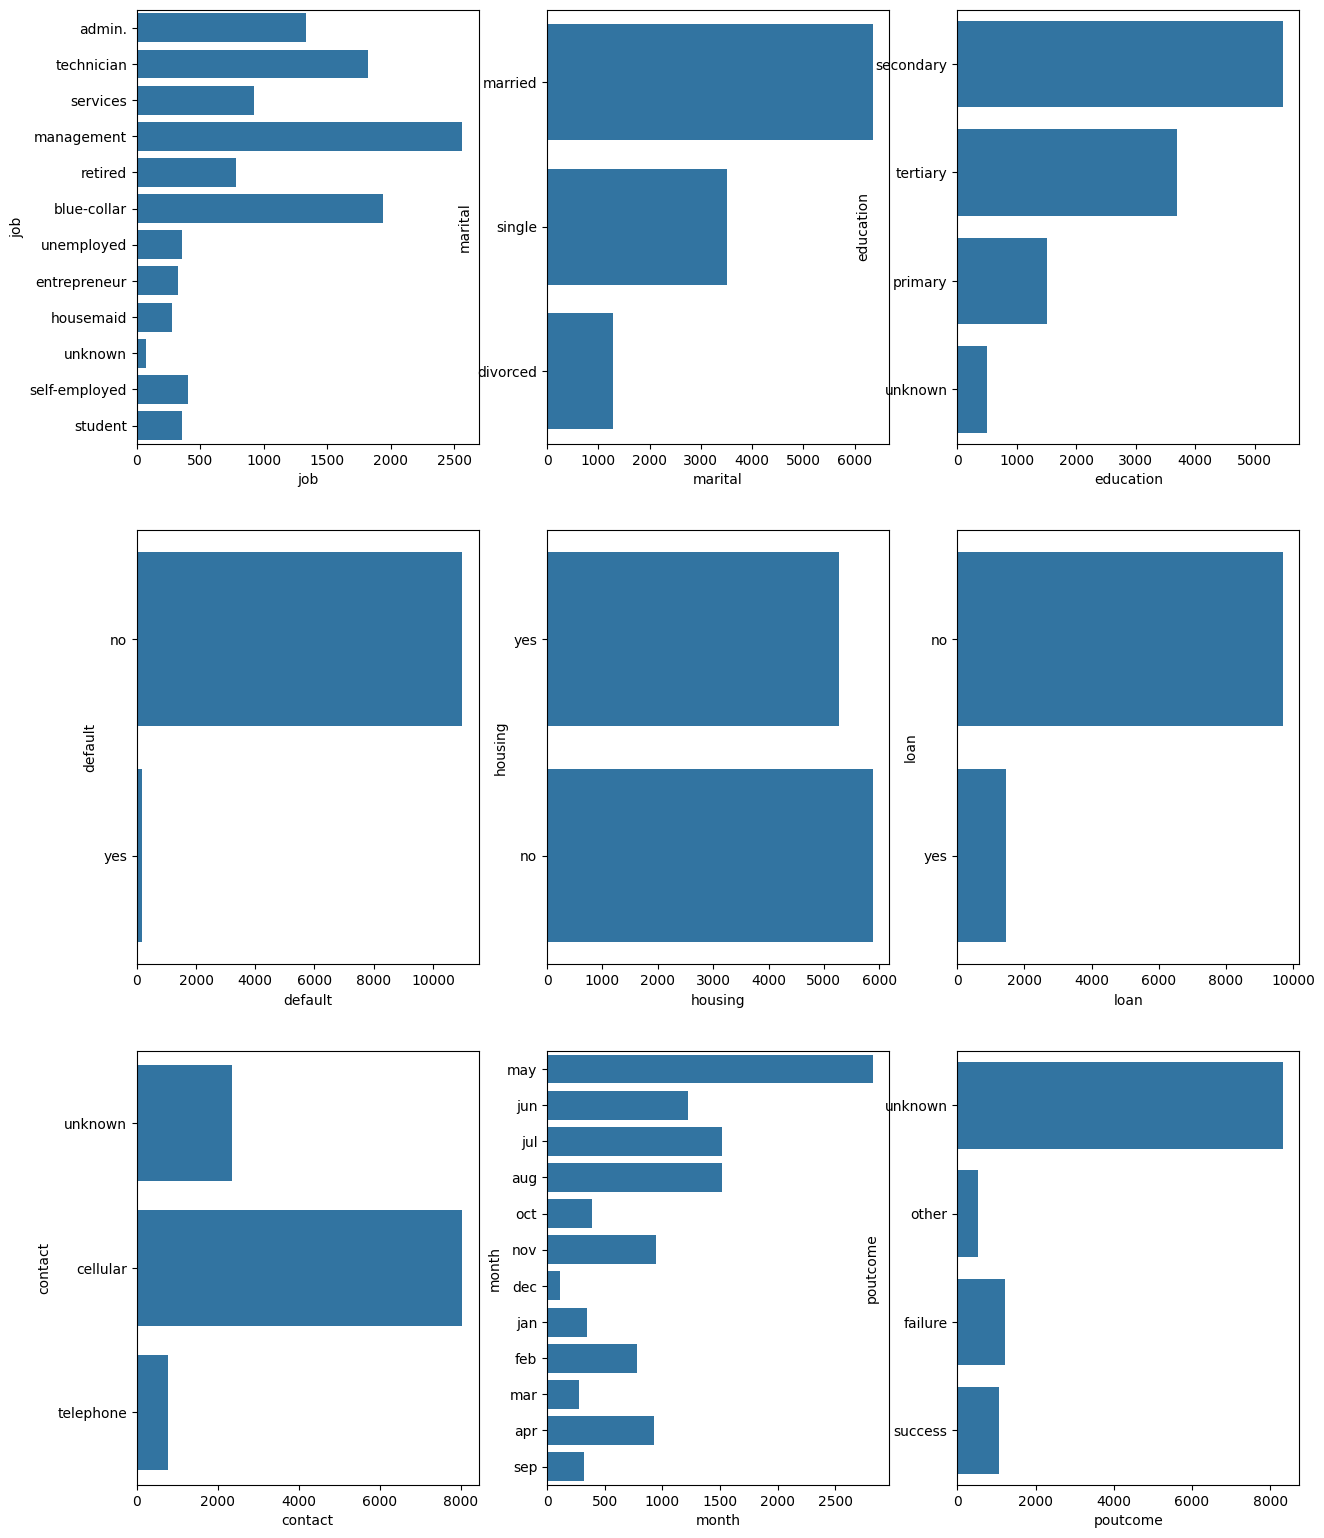

In [173]:
#feature distribution
plt.figure(figsize=(15,80),facecolor='white')
plotnumber =1
for i in l:
  ax=plt.subplot(12,3,plotnumber)
  sns.countplot(y=i,data=df)
  plt.xlabel(i)
  plt.ylabel(i)
  plotnumber+=1
plt.show()

In [ ]:
#client with job type as management records are high in given dataset and housemaid are very less
#client who married are high in records in given dataset and divorced are  less
#default feature seems to be does not play important role as it has value of no  at high ratio to value yes which can drop
#data in month of may is high and less in dec

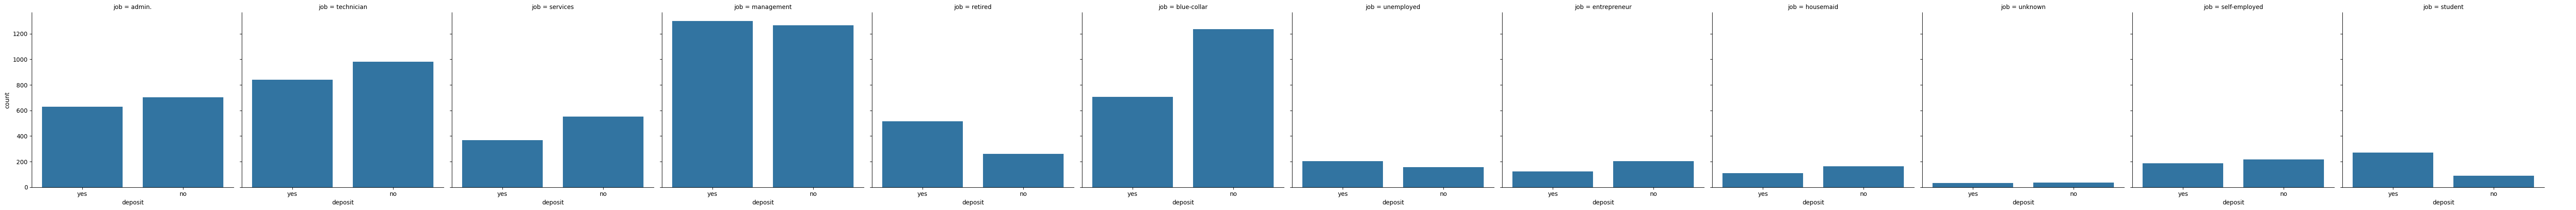

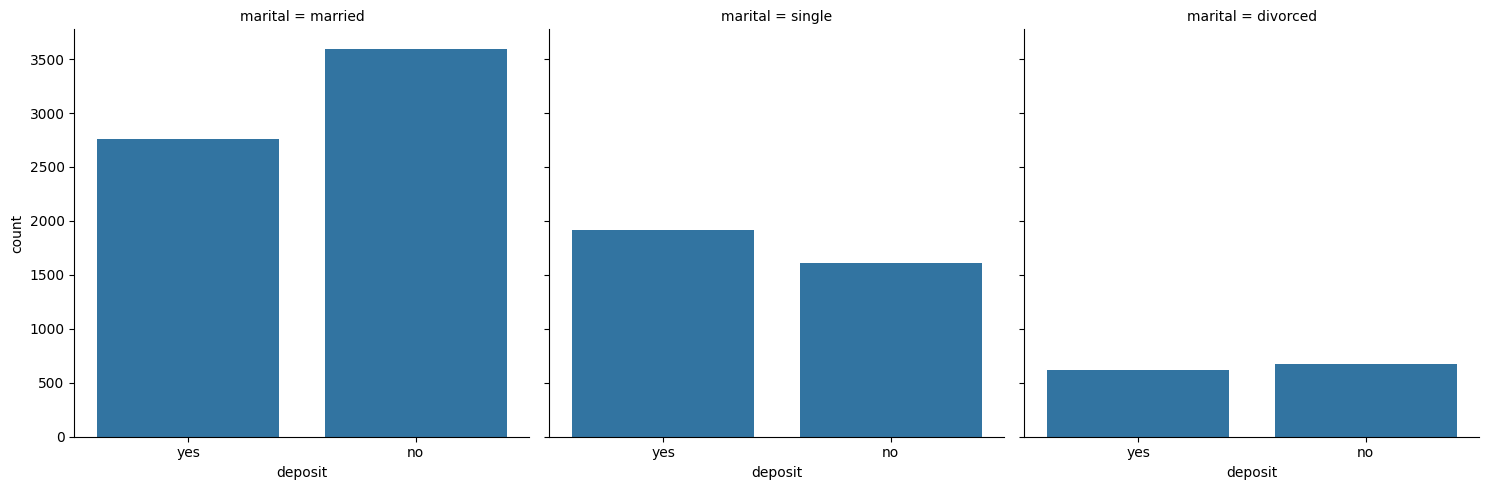

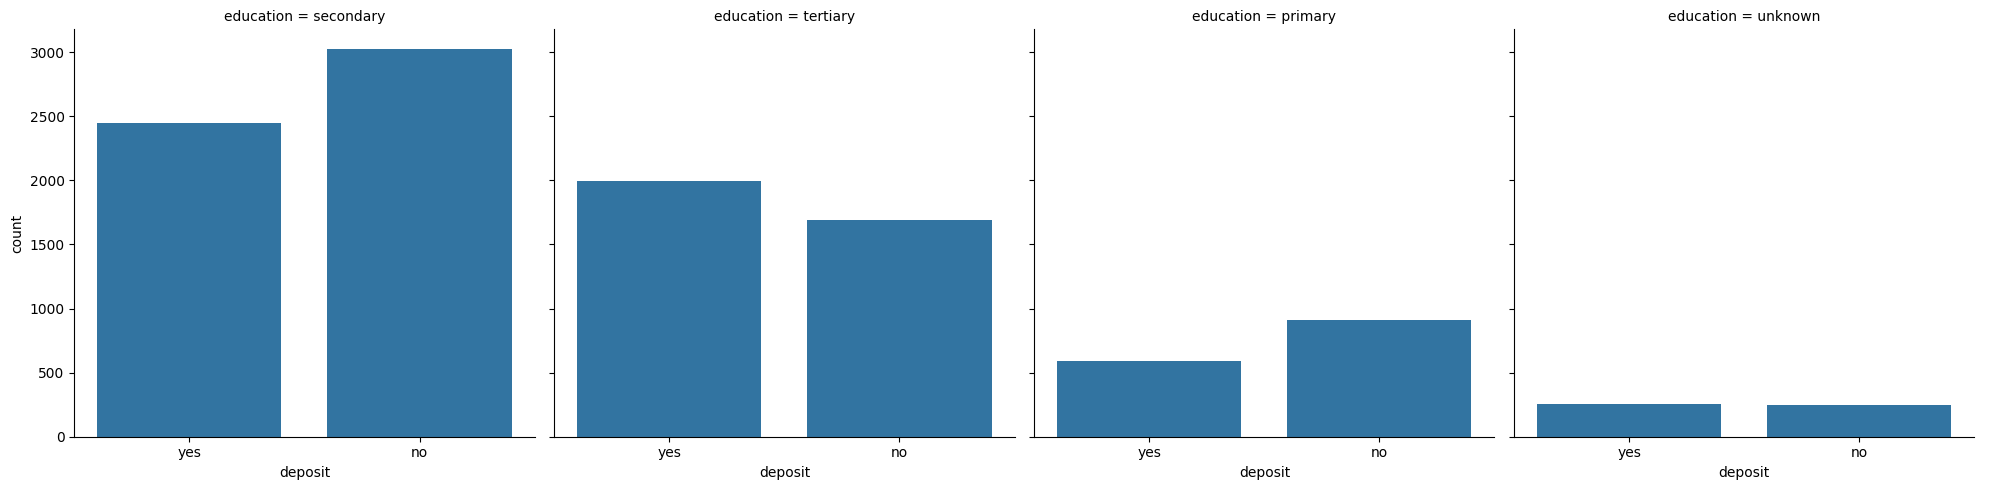

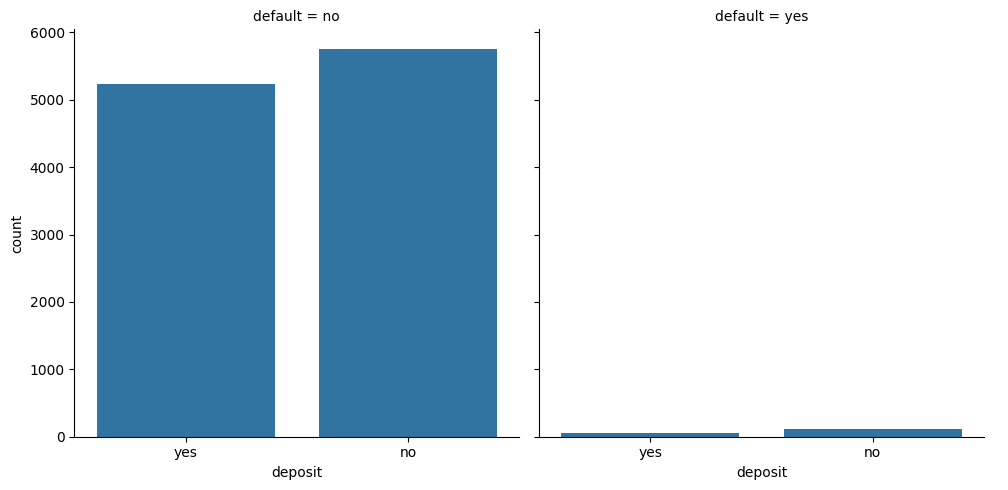

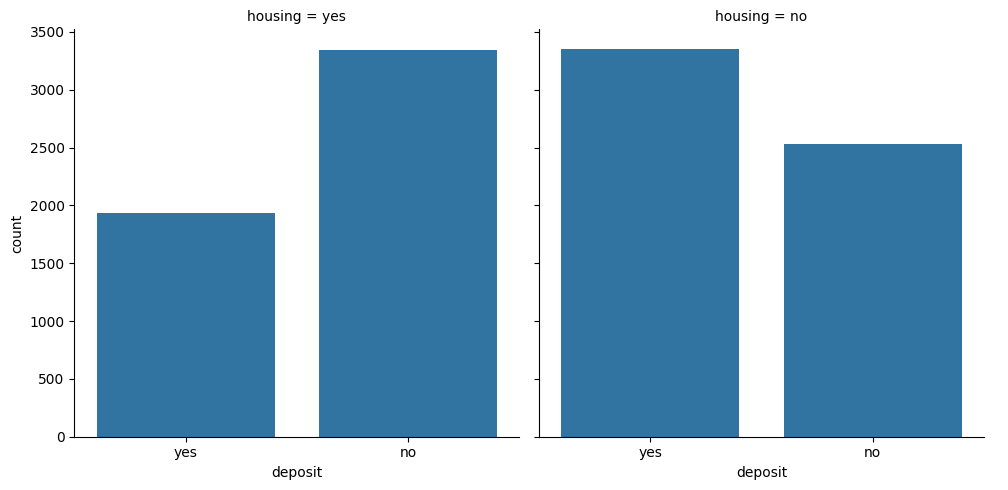

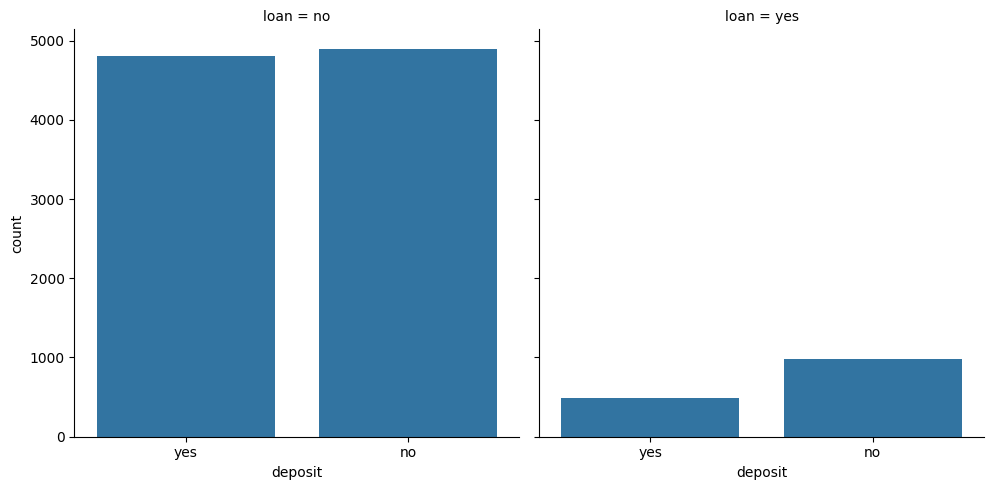

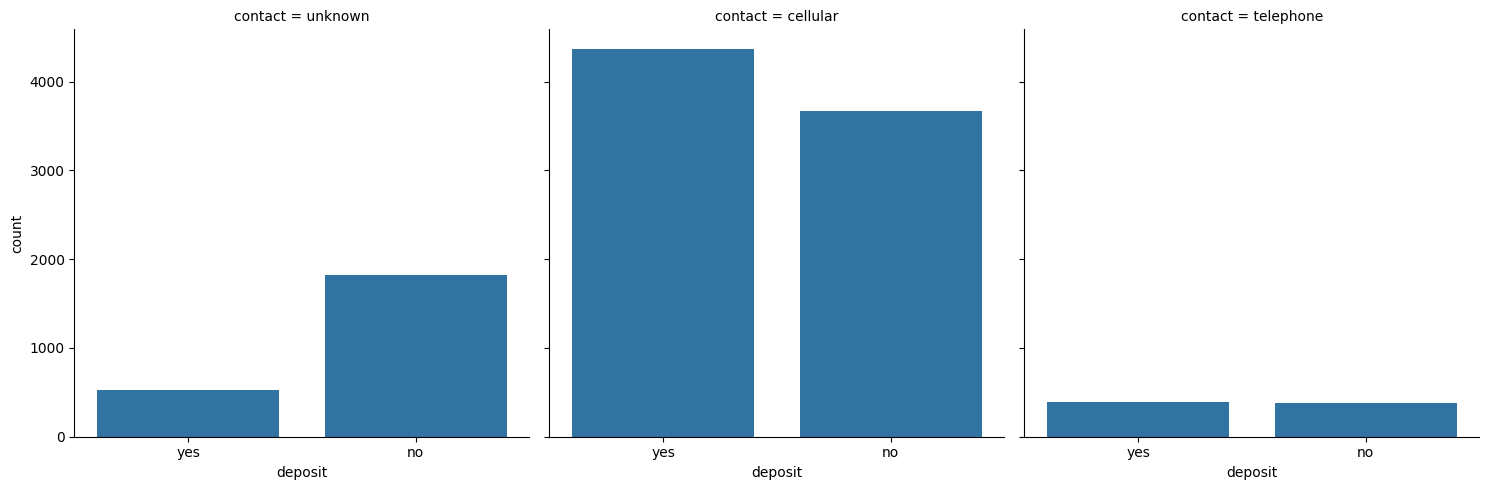

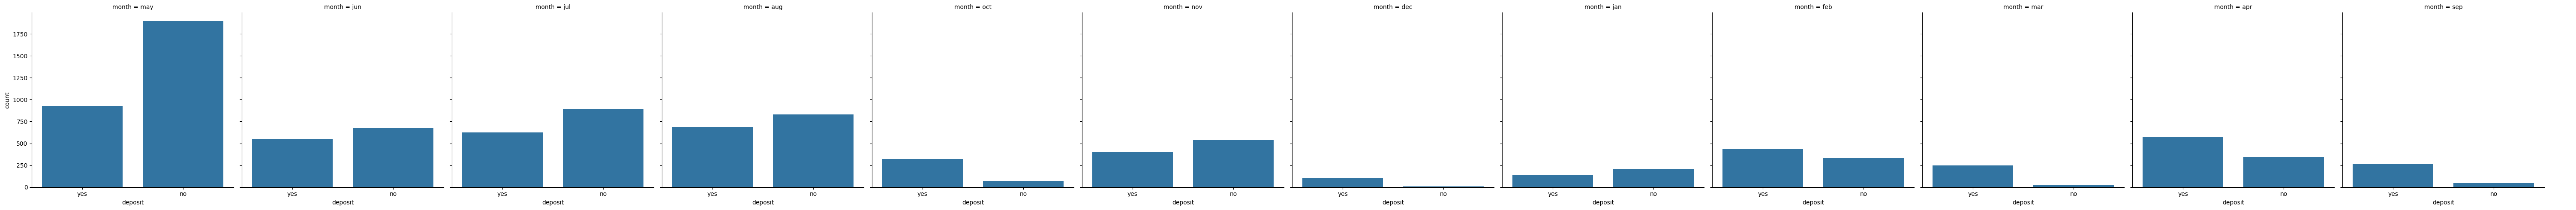

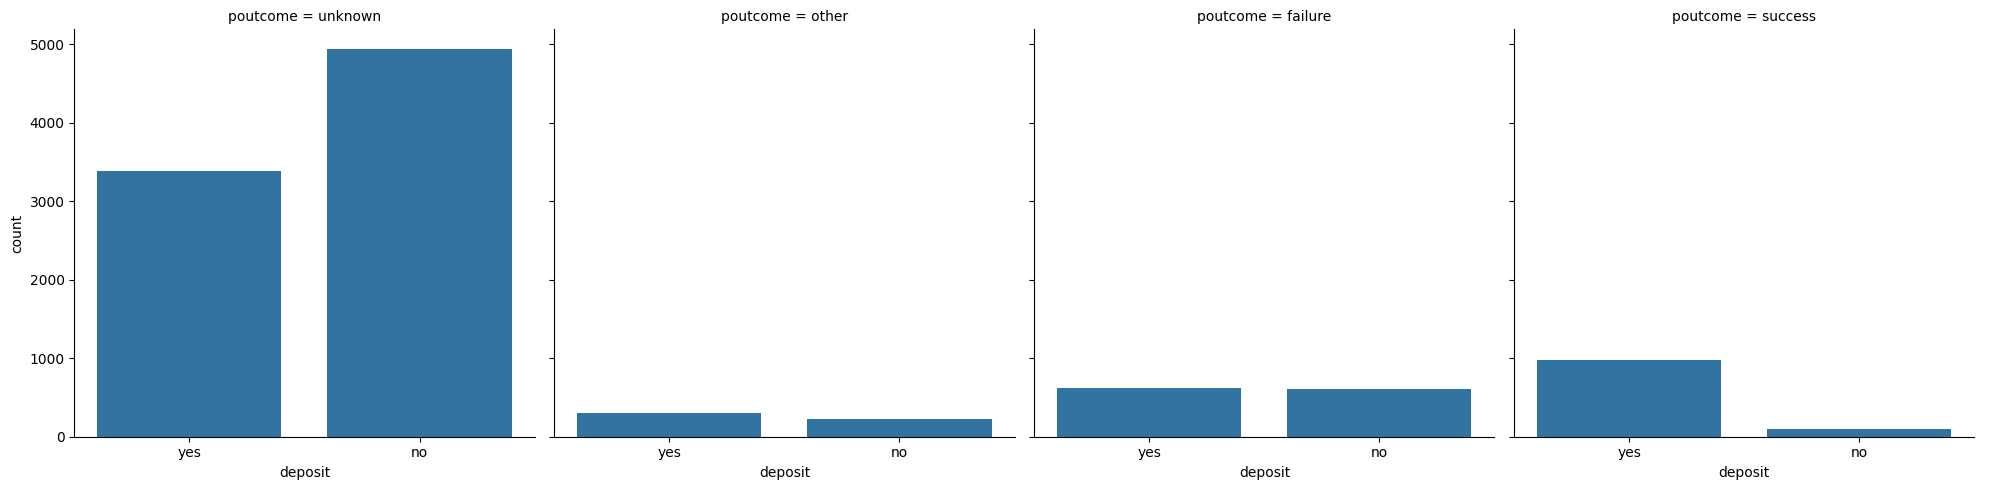

In [174]:
#relationship between categorical features and label
for j in l:
  sns.catplot(x='deposit',col=j,kind='count',data=df)
plt.show()

In [175]:
#check target label split over categorical features and find the count
for k in l:
  print(df.groupby(['deposit',k]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [ ]:
#retired client has high interest on deposit
#clint who has housing loan seems to be not interested much on deposit
#of pre campaign outcome that is poutcome=success then, there is high chance of client to show interest on deposit
#in month of march, september, october and december client show high interest to deposit

In [176]:
#Numerical features
N=[i for i in df.columns if ((df[i].dtype !='O') & (i not in ['deposit']))]
print(len(N))
print(df[N].head())

7
   age  balance  day  duration  campaign  pdays  previous
0   59     2343    5      1042         1     -1         0
1   56       45    5      1467         1     -1         0
2   41     1270    5      1389         1     -1         0
3   55     2476    5       579         1     -1         0
4   54      184    5       673         2     -1         0


In [ ]:
#number of numeriacl variable: 7
#there are 7 numeriacl features

In [177]:
#discrete numeriacl  value
ds_n=[i for i in N if len(df[i].unique())<25]
print(len(ds_n))

0


In [ ]:
#there is no discret feature
#there are 7 continuous feature

<ipython-input-178-321382898a1d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-178-321382898a1d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-178-321382898a1d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

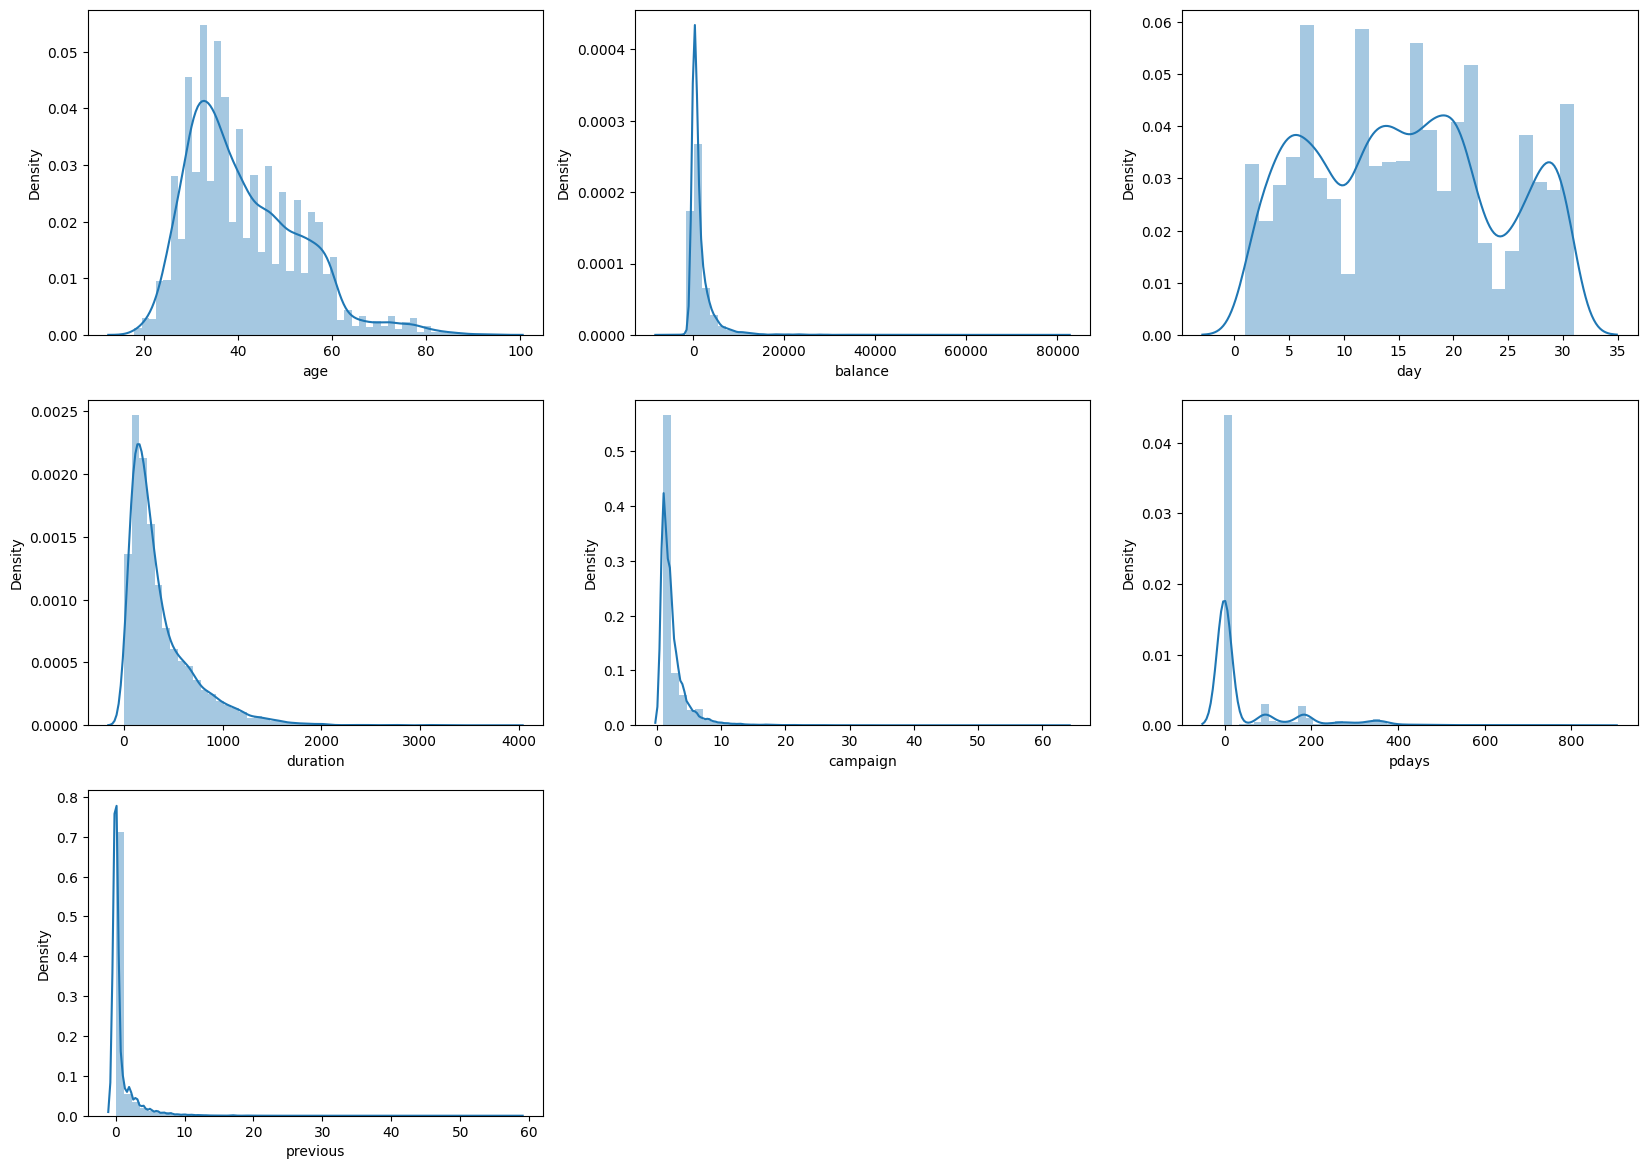

In [178]:
#Distribution of continuous numerical features
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in N:
  ax = plt.subplot(12,3,plotnumber)
  sns.distplot(df[i])
  plt.xlabel(i)
  plotnumber+=1
plt.show()

In [ ]:
#it seems age ,days distributed normally
#balance , duration,compaign,pdays and previous healthy skewed towards left and seems to be have some outliers.

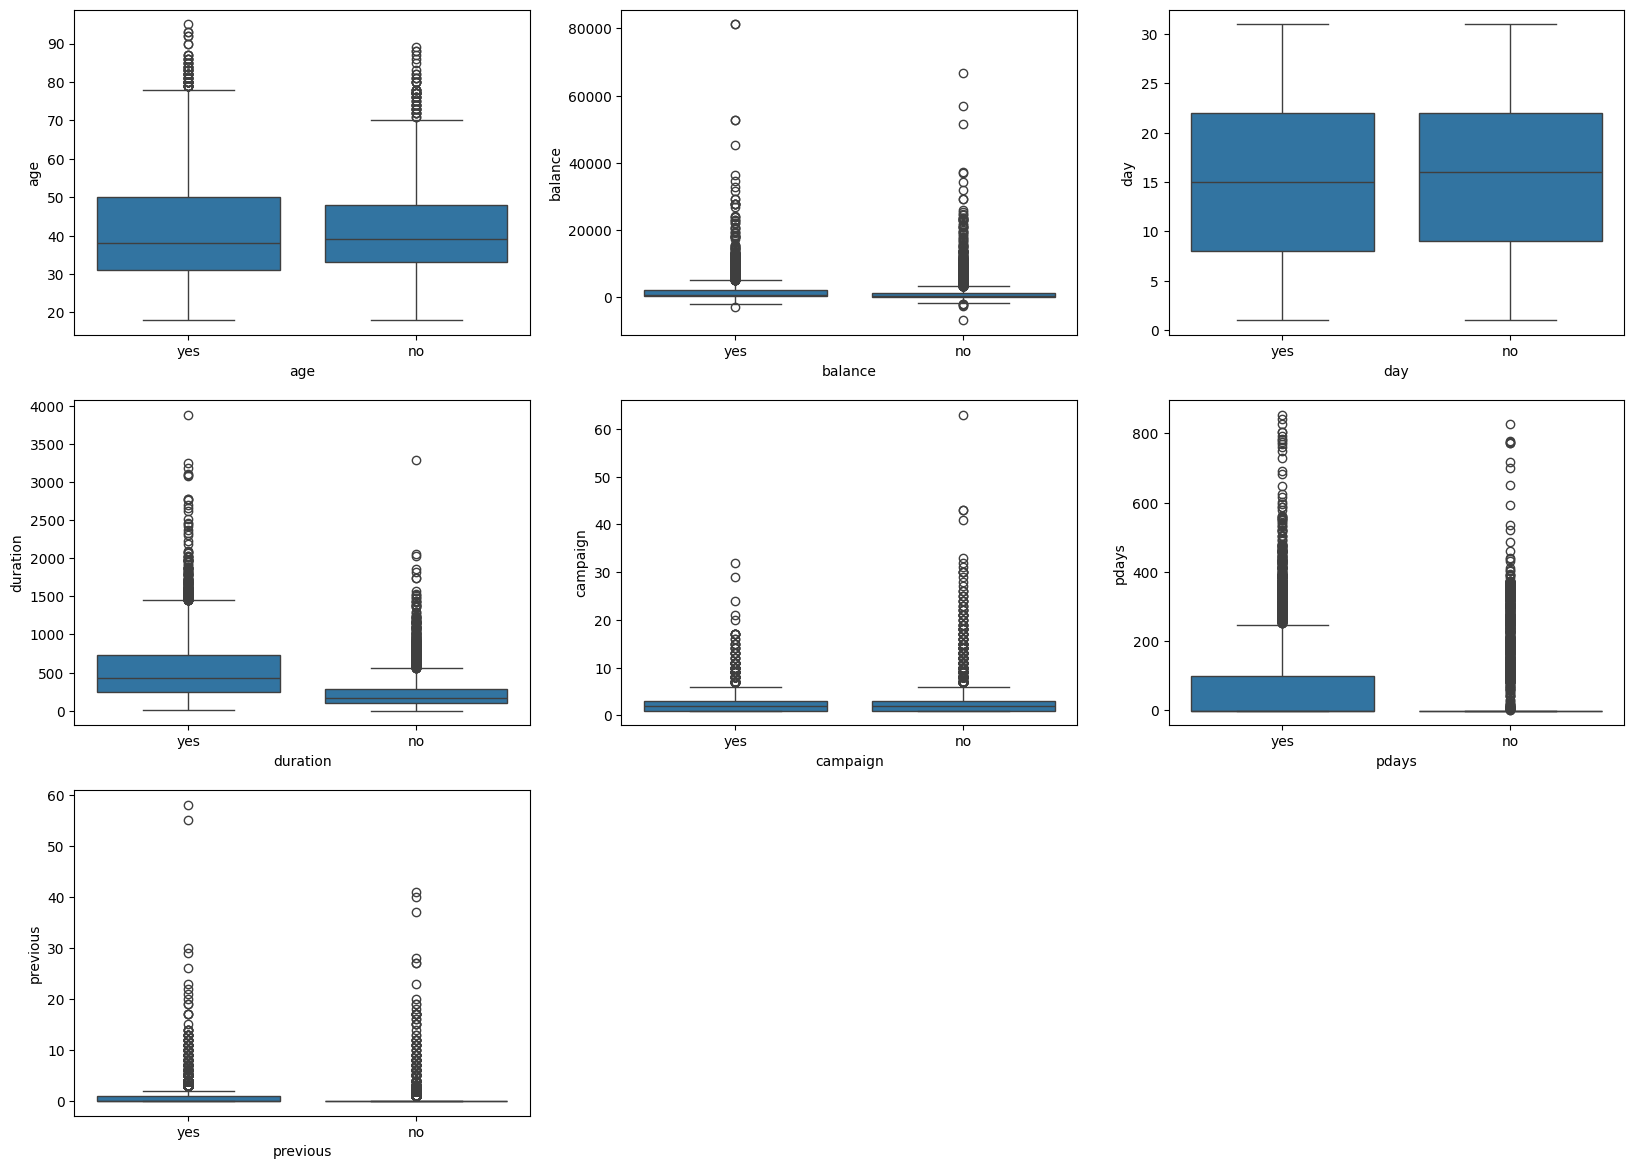

In [179]:
#relation between continuous numerical features and labels
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in N:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(x='deposit',y=df[i],data=df)
  plt.xlabel(i)
  plotnumber+=1
plt.show()

In [ ]:
#client shows interest on deposit who had discussion for longer duration

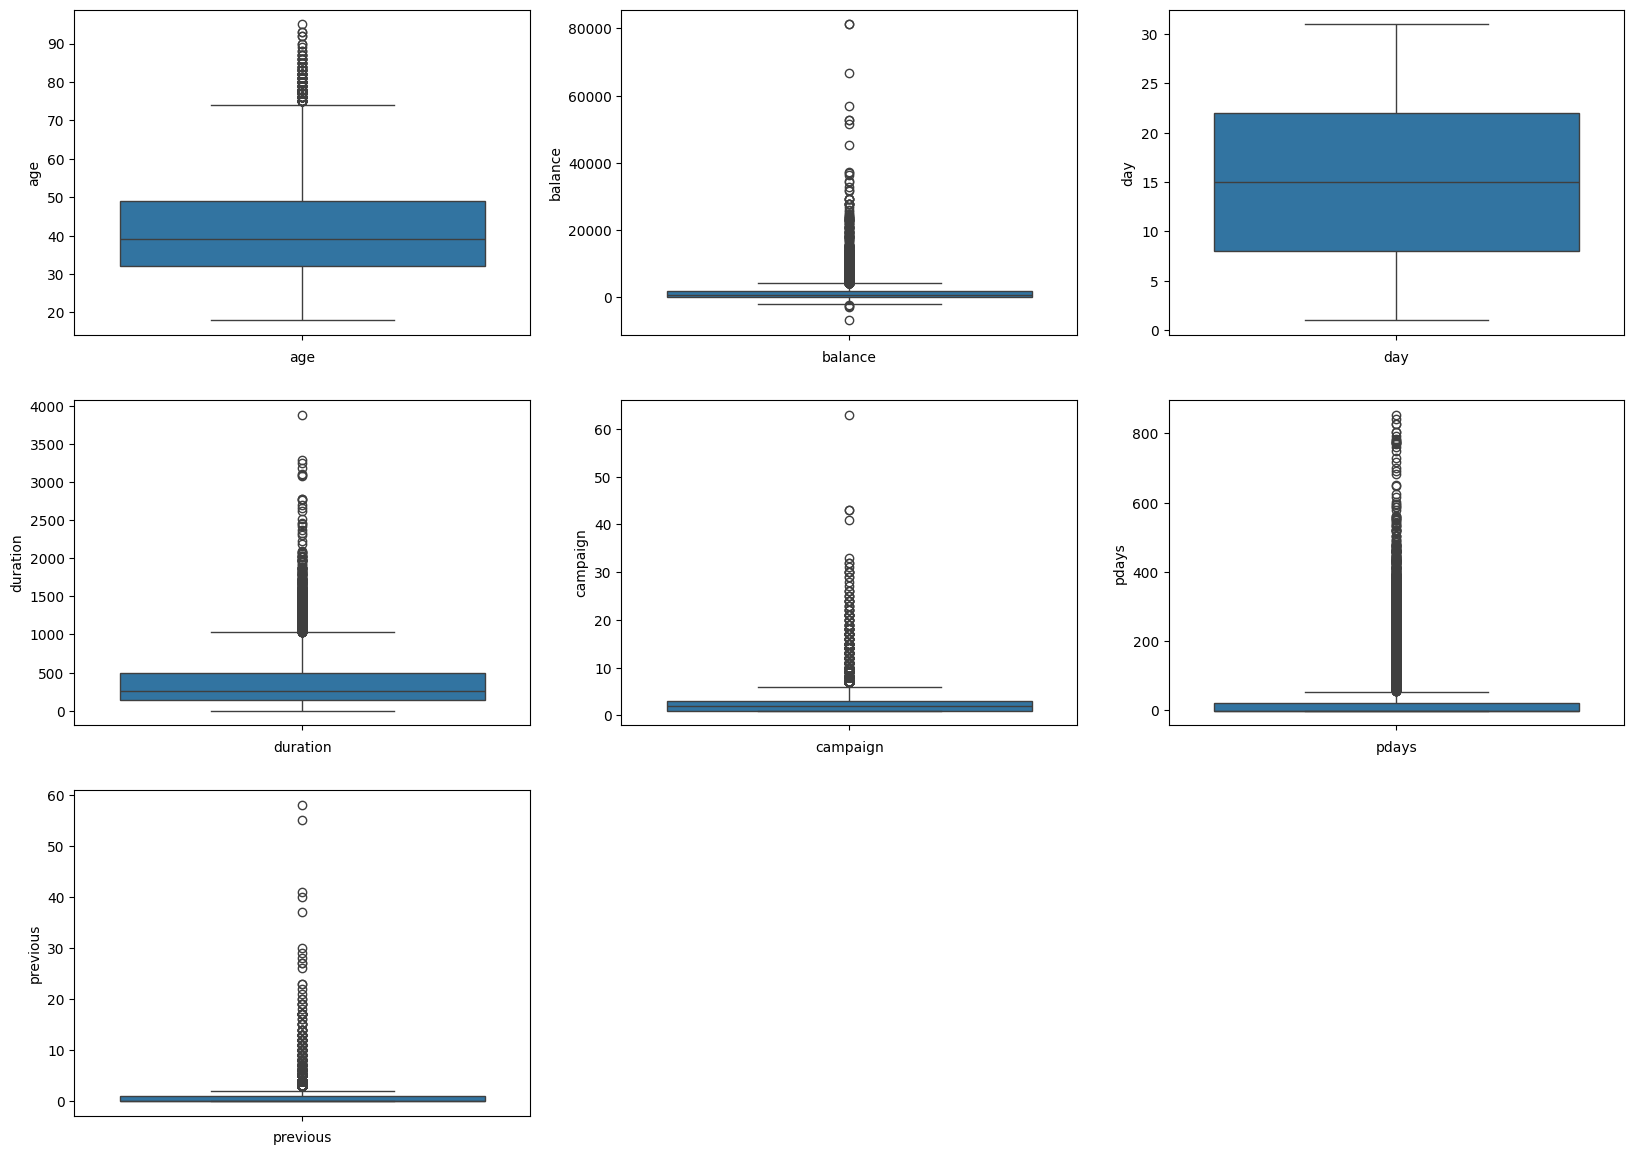

In [180]:
#boxploton numerical features to find outliers
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for i in N:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotnumber+=1
plt.show()

In [ ]:
#age, balance, duration, compaign, pdays and previous has some outliers

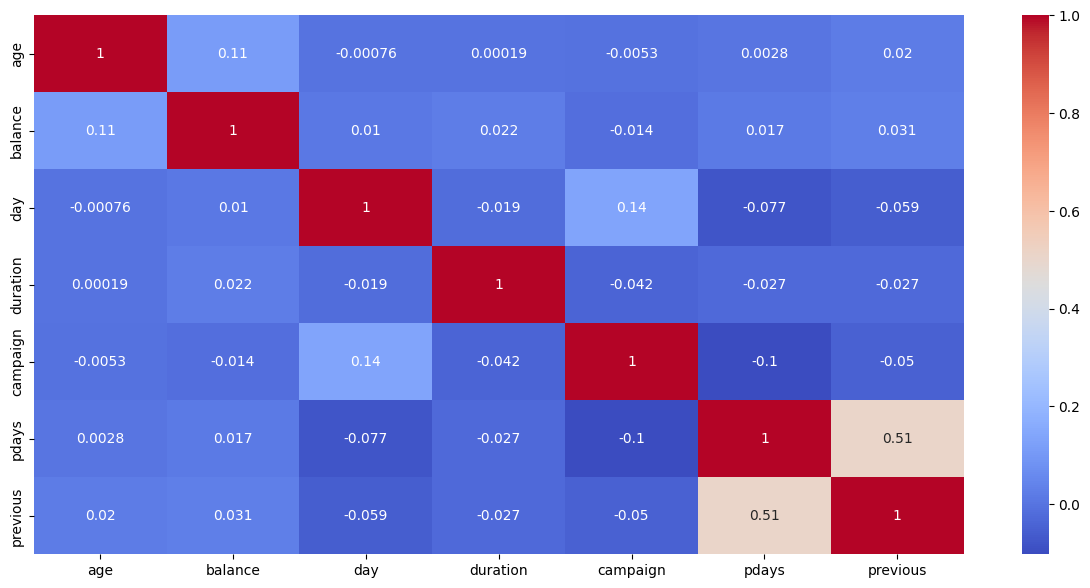

In [181]:
#checking for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_mat = numeric_df.corr()
fig = plt.figure(figsize=(15, 7))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")

plt.show()


In [ ]:
#it seems no feature is heavily correlated with other features

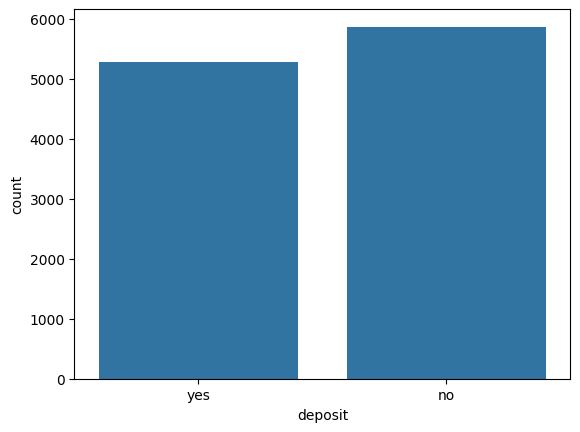

In [182]:
sns.countplot(x='deposit',data=df)
plt.show()

In [183]:
df['deposit'].groupby(df['deposit']).count()

,deposit
deposit,
no,5873
yes,5289


In [ ]:
#given dataset seems to be balanced

# Feature Engineering

In [ ]:
#drop unwanted features
#handle missing value
#handle categorical features
#handle feature scaling
#remove outliers

In [184]:
dff=df.copy()
dff.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [185]:
dff.shape

(11162, 17)

In [186]:
#default features does not play important role
dff.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [187]:
dff.drop(['default'],axis=1,inplace=True)

In [188]:
dff.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [189]:
#drop pdays as it has -1 value for around 40% +
dff.drop(['pdays'],axis=1,inplace=True)

In [190]:
#remove outliers in feature age..
dff.groupby('age',sort=True)['age'].count()

,age
age,
18,8
19,13
20,20
21,30
22,48
...,...
89,1
90,2
92,2


In [ ]:
#these can be ignored and values lies in between 18  to 95

In [191]:
#remove outliers in feature balance..
dff.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [ ]:
#these outliers should not be remove as balance goes high, client show interest on deposit

In [192]:
#remove outliers in feature duration..
dff.groupby(['deposit','duration'],sort=True)['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [ ]:
#these outliers should not be remove as duration goes high, client show interest on deposit

In [193]:
#remove outliers in feature campaign..
dff.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [194]:
dfff=dff[dff['campaign']<33]

In [195]:
dfff.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [196]:
#remove outliers in feature previous..
dfff.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10            26
         11            15
         12            10
         13             9
         14             5
         15             1
         17             3
         19             2
         20             1
         21             1
         22             1
         23             1
         26             1
         29             1
         30             1
         55             1
         58             1
Name: previous, dtype: int64

In [201]:
df4=dfff[dfff['previous']<31]

In [202]:
#ohe/dummy
cat_column = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in cat_column:
    dummies = pd.get_dummies(df4[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)
    dummies = dummies.astype(int)  # Convert True/False to 1/0
    df4 = pd.concat([df4.drop(col, axis=1), dummies], axis=1)


In [204]:
bool_col=['housing','loan','deposit']
for i in bool_col:
  df4[i+'_new']=df4[i].apply(lambda x : 1 if x == 'yes' else 0)
  df4.drop(i, axis=1, inplace=True)

In [205]:
df4.head()


,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


Split Dataset into Training and set and Test set

In [207]:
x =df4.drop(['deposit_new'],axis=1)
y =df4['deposit_new']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [208]:
len(x_train)

8921

In [209]:
len(x_test)

2231

Model Selection

In [212]:
#will try to use below two model that are Randomforestclassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [216]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=x_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85546218 0.84304933 0.84360987 0.85482063 0.8514574 ]
0.8496798809209782


In [217]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=x_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85658263 0.85762332 0.85313901 0.85650224 0.86154709]
0.8570788584492093


Model Building

In [218]:
model_xgb=XGBClassifier(Objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [220]:
model_xgb.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:48:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "Objective" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(Objective='binary:logistic', base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [221]:
model_xgb.score(x_test,y_test)

0.8565665620797849

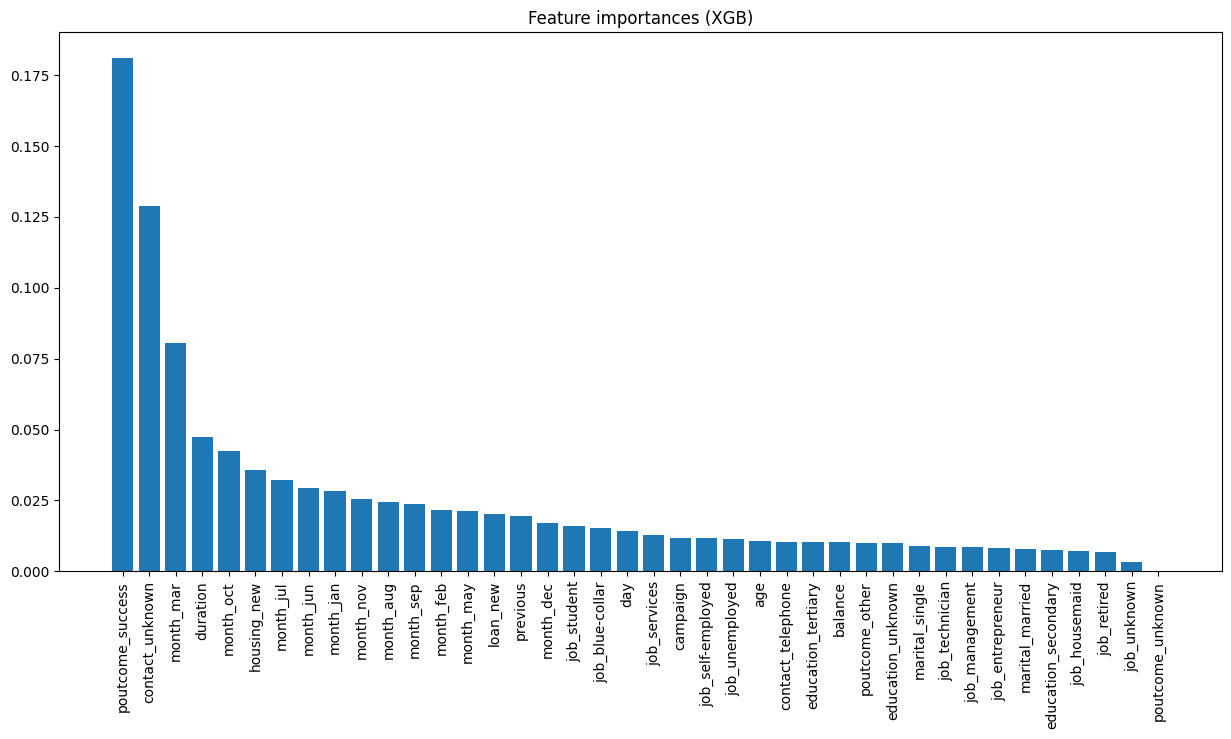

In [223]:
#get feature importance from the model
headers=['name','score']
values=sorted(zip(x_train.columns,model_xgb.feature_importances_),key=lambda x: x[1]* -1)
xgb_feature_importances=pd.DataFrame(values,columns =headers)

#plot feature importances
fig =plt.figure(figsize=(15,7))
x_pos =np.arange(0,len(xgb_feature_importances))
plt.bar(x_pos,xgb_feature_importances['score'])
plt.xticks(x_pos,xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')
plt.show()

In [224]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model_xgb.predict(x_test))
cm

array([[989, 190],
       [130, 922]])

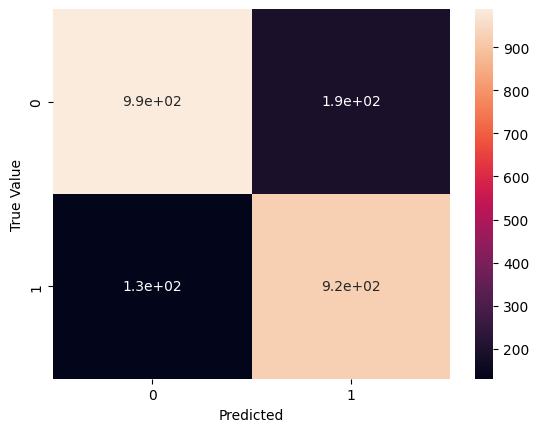

In [226]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()